In [1]:
import pandas as pd
import numpy as np
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] 
from statsmodels.tsa.vector_ar.var_model import VAR

#from graphviz import Digraph
from statsmodels.tsa.stattools import coint

In [2]:
mobile = np.load('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Tokyostation/Tokyostation_2021.npy')
users = np.load('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Tokyostation_2021/users.npy')

In [3]:
mobile_flatten = mobile.flatten()
users_flatten = users.flatten()

In [4]:
columns_mobile = ['population']
columns_users = ['Twitter_users']
df_mobile = pd.DataFrame(data=mobile_flatten, columns=columns_mobile, dtype='float')
df_users = pd.DataFrame(data=users_flatten , columns=columns_users, dtype='float')

In [5]:
df = pd.concat([df_mobile,df_users],axis=1)

<Axes: >

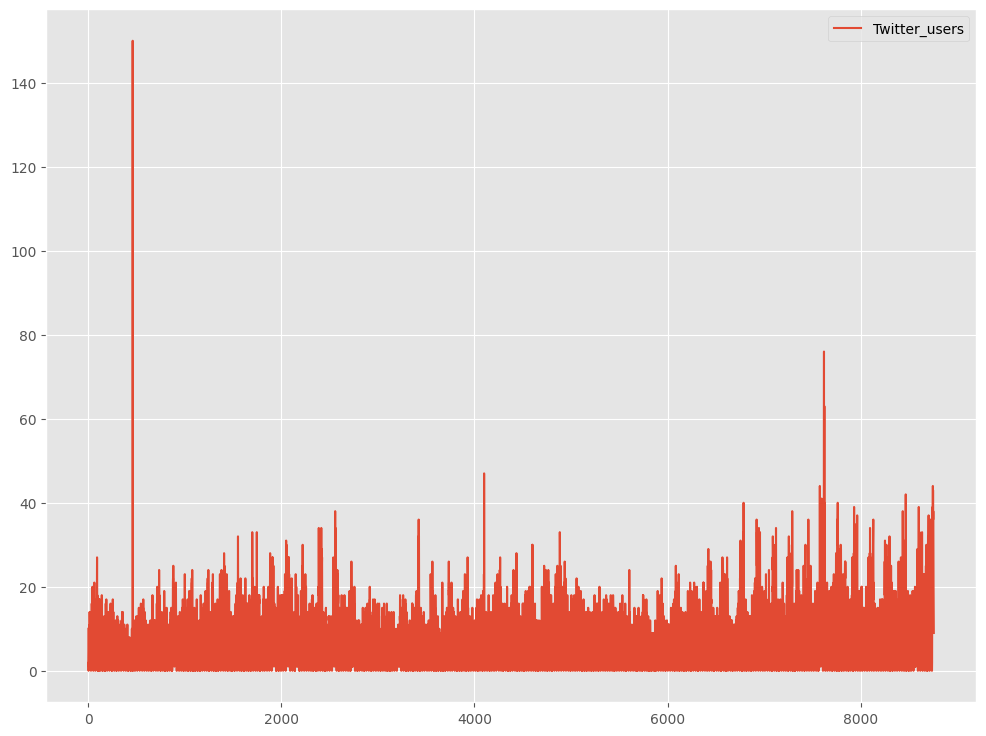

In [6]:
df_users.plot()

In [7]:
# Augmented Dickey-Fuller 単位根検定（帰無仮説：単位根がある）
ct_results = adfuller(df['population'],regression='ct')  #対立仮説：定数項＋トレンド＋定常過程
c_results = adfuller(df['population'],regression='c')    #対立仮説：定数項＋定常過程
n_results = adfuller(df['population'],regression='n')    #対立仮説：定常過程（定数項なし）
# p値
print(ct_results[1])
print(c_results[1])
print(n_results[1])

1.955638792640547e-21
1.66586249936653e-24
0.0004047783468932523
